# Problem statement:
This dataset has 17 columns and 30 rows. Our task is to analyze the dataset and predict the number of wins a baseball team will attain by developing a supervised machine learning model.

In [1]:
# Import all the required liabrary
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE

In [2]:
#Load Baseball Data Set
df = pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [3]:
#check the shape of data
df.shape

(30, 17)

Dataset is having 30 Rows and 17 columns.

In [4]:
#Check if any missing value present in data
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

This Data set is not having any missing values.

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Above we can see the description of baseball dataset.

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

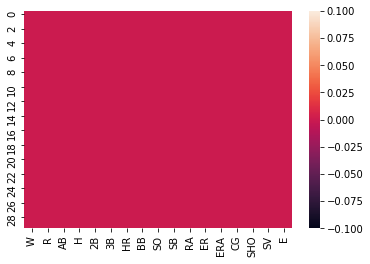

In [6]:
sns.heatmap(df.isnull())

W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

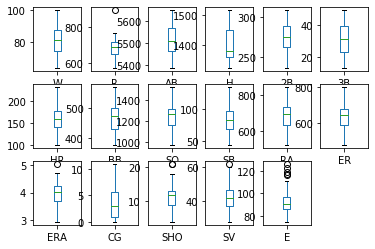

In [7]:
#check outliers
df.plot(kind='box',subplots=True,layout=(3,6))

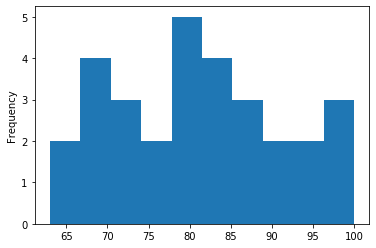

In [8]:
#Check skewness of data set
df['W'].plot.hist()

Data is very much spred so to remove the spredness we use boxcox

In [9]:
from scipy.stats import boxcox
df['W']=boxcox(df['W'],0) 

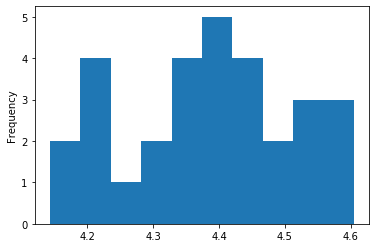

In [10]:
df['W'].plot.hist()

now data is quit bell shaped.

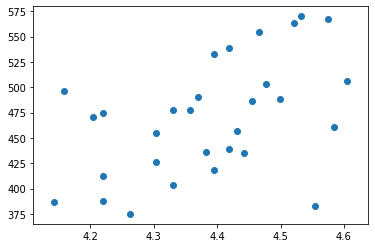

In [32]:
plt.scatter(df['W'],df['BB'])
plt.show()

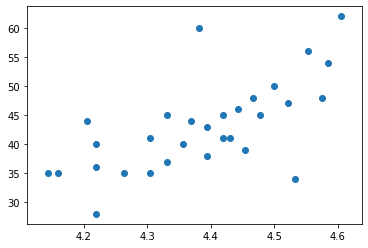

In [30]:
plt.scatter(df['W'],df['SV'])
plt.show()

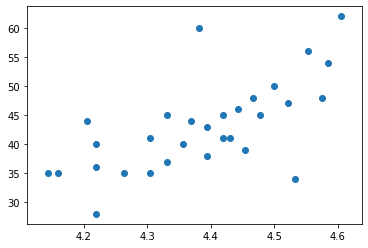

In [33]:
plt.scatter(df['W'],df['SV'])
plt.show()

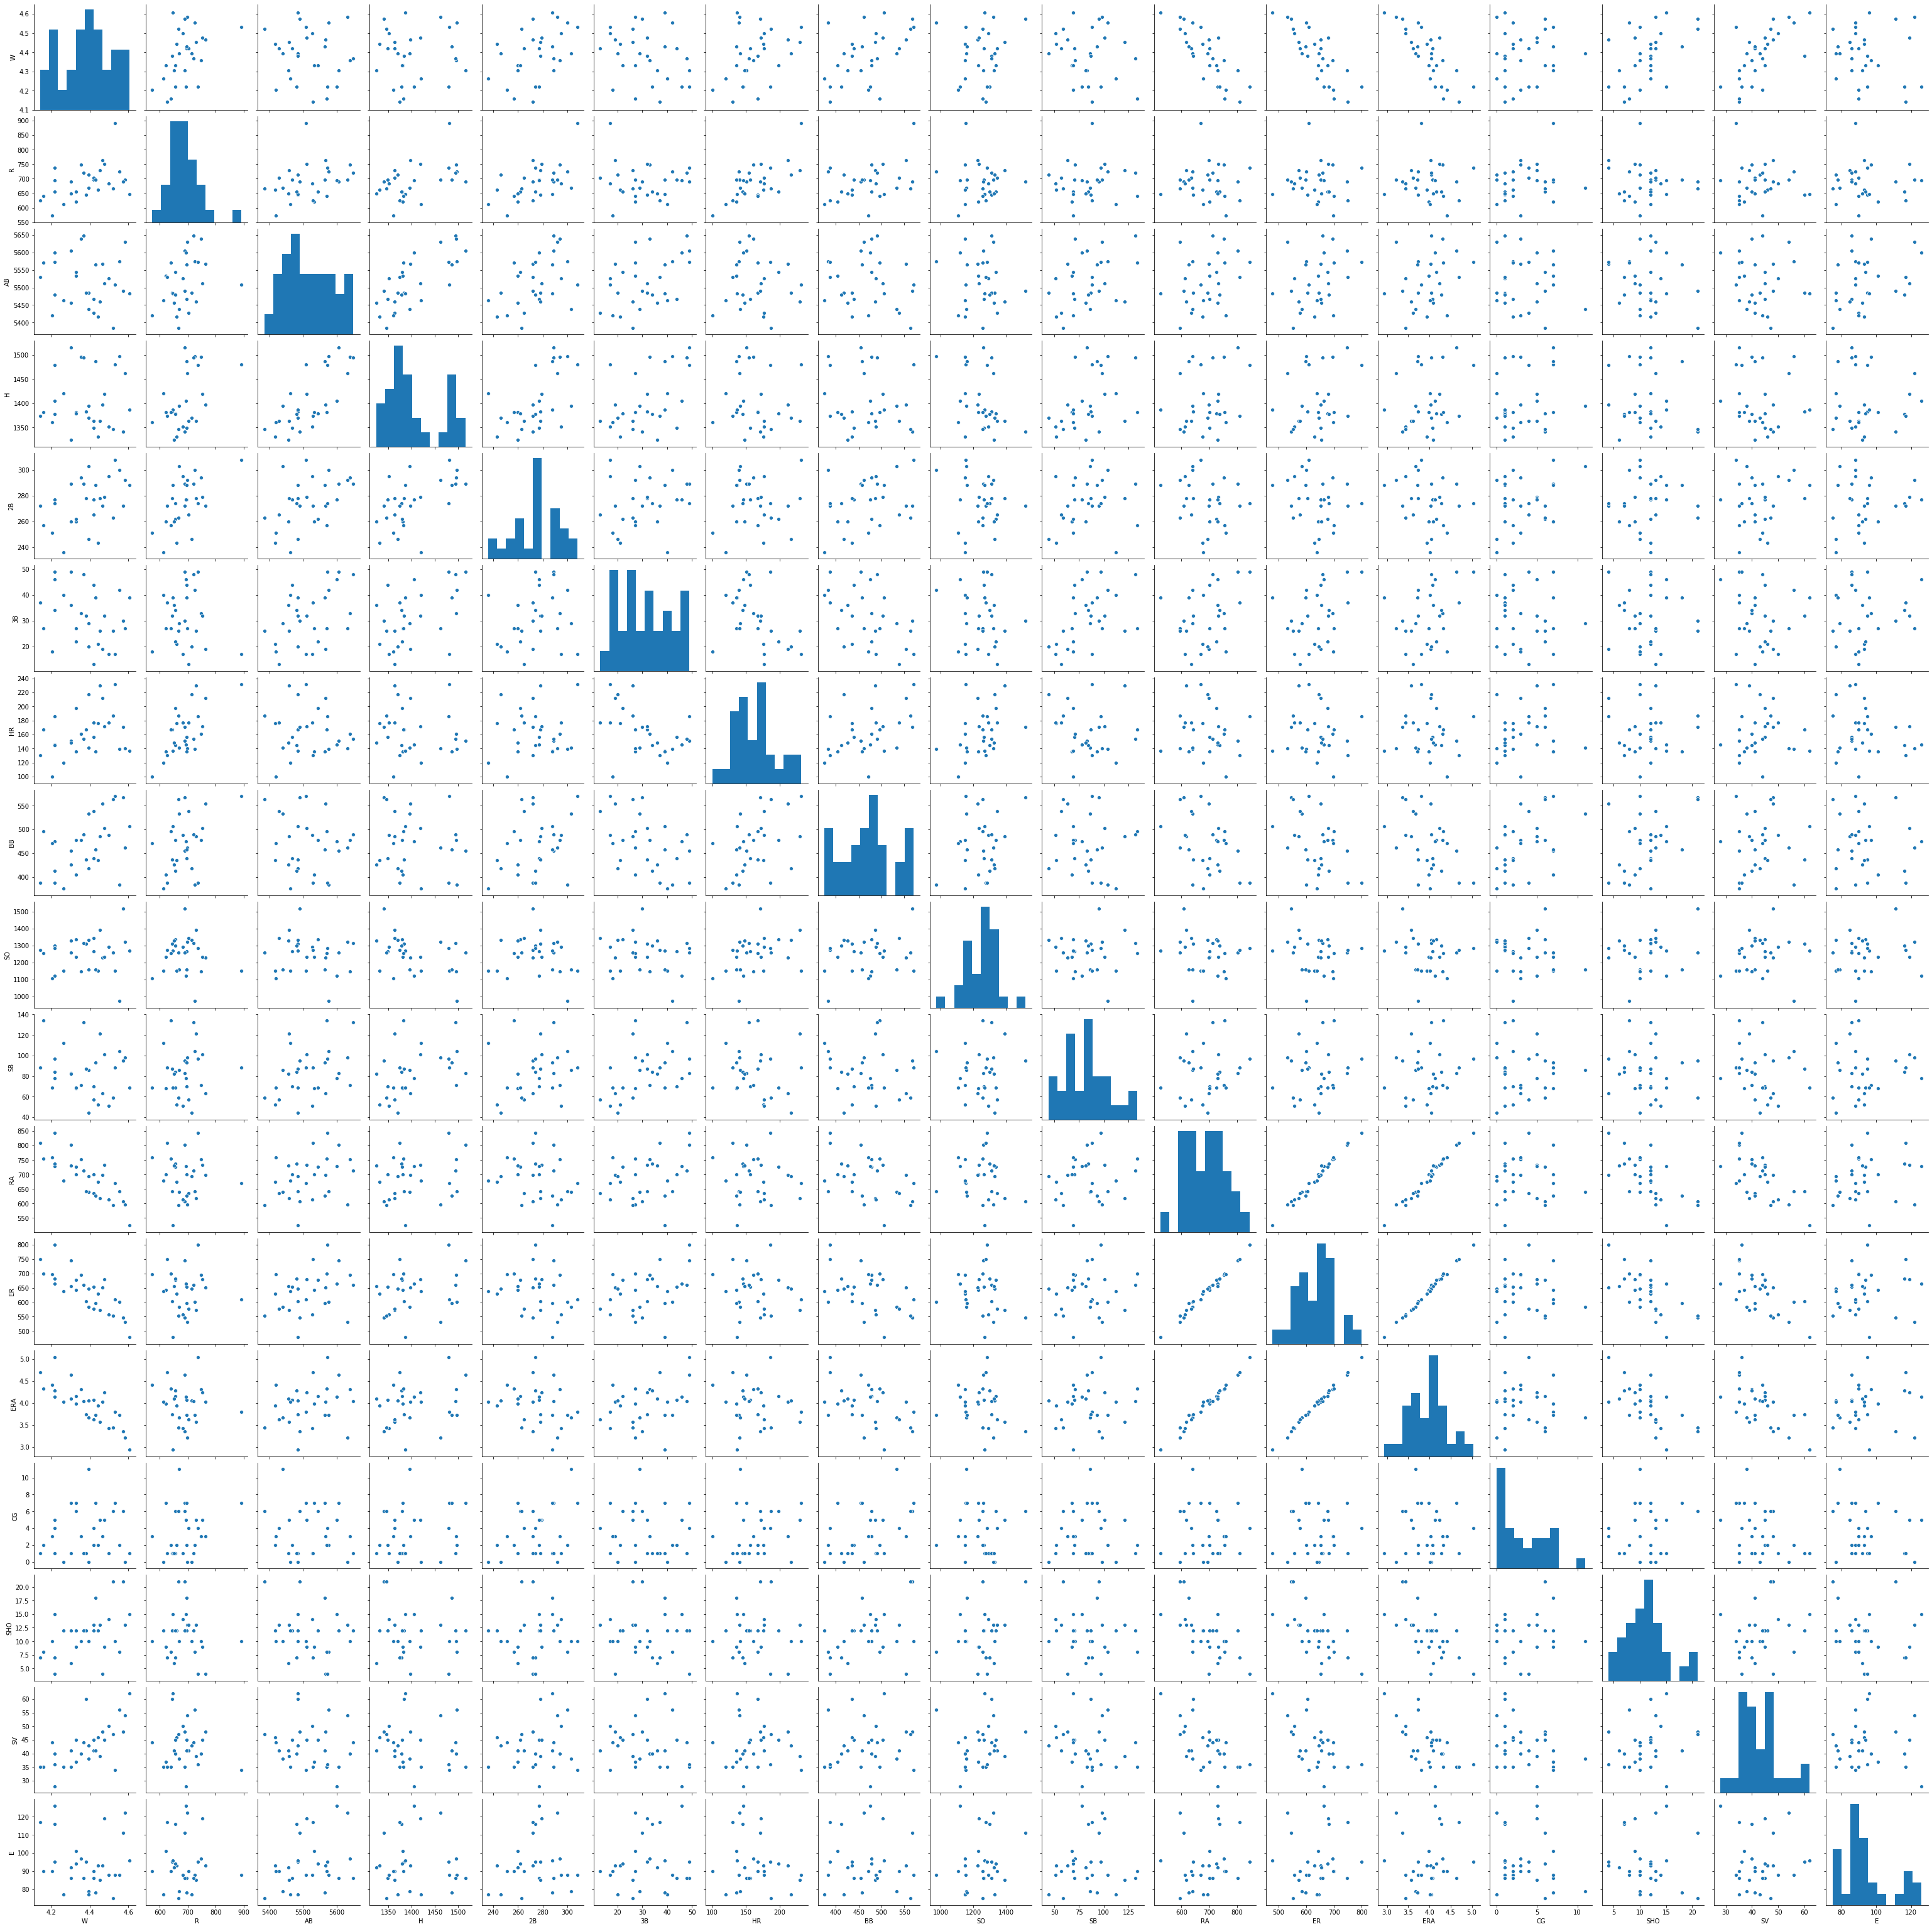

In [34]:
sns.pairplot(df)
plt.show()

# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [23]:
#check data types 
df.dtypes

W      float64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [24]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.442432,-0.094833,0.038874,0.423280,-0.258021,0.326459,0.484527,0.111271,-0.173762,-0.809718,-0.804067,-0.813779,0.097715,0.469953,0.658846,-0.119665
R,0.442432,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.094833,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.038874,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.423280,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.258021,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.326459,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484527,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111271,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.173762,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


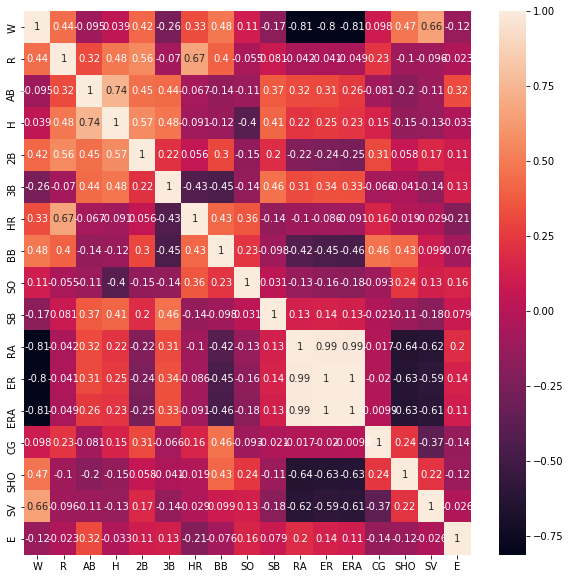

In [25]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the number of wins a baseball team will attain and we want to identify a relation between our output (W) and remaining independent features . This scenario is a classic example of Regression (Predict number of wins).

We are provided with 30 rows of the labeled dataset tagged with the output column “W” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Regression problem. Based on these criteria we can narrow down our choice of models to a few:

Linear Regression

SVR()

Lasso()

Ridge()

ElasticNet()


# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [35]:
y = df["W"]
x = df.drop("W",axis=1)


In [36]:
x.shape

(30, 16)

In [37]:
y.shape

(30,)

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 100)


In [39]:
model = [LinearRegression(),SVR(kernel = 'linear'),Lasso(alpha=0.01),Ridge(alpha=0.01),ElasticNet(alpha=0.01)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('error')
    print('mae',mean_absolute_error(y_test,predm))
    print('mse',mean_squared_error(y_test,predm))
    print('rmse',np.sqrt(mean_squared_error(y_test,predm)))
    print(r2_score(y_test,predm))
    print('\n')

error
mae 0.056404231130354
mse 0.005074449910233488
rmse 0.07123517326597506
0.25378865483170976


error
mae 0.017677972169346745
mse 0.0003188042990804362
rmse 0.017855091685019045
0.9531189805652649


error
mae 0.038539105689926245
mse 0.002385259701800162
rmse 0.0488391206083828
0.6492412217792262


error
mae 0.04271988590038216
mse 0.00260961548029351
rmse 0.051084395663387364
0.6162491083034038


error
mae 0.044909382767775875
mse 0.002893264369762887
rmse 0.05378907295876075
0.5745377852810634




# we can observe that SVR() algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of Linear Regression is 25%

Accuracy score of SVR is 95%

Accuracy score of Lasso() is 64%

Accuracy score of Ridge() is 61%

Accuracy score of ElasticNet() is 57%


Hence we can say that out all algorithems SVR is best for this problem till now however we will use cross validation to select best model.

## Model Validation

In [40]:
clf = SVR(kernel = 'linear')

scores = cross_val_score(clf,x,y,cv=5,scoring='r2')
scores

array([ 0.55330732, -1.31095498,  0.00454304,  0.32947421,  0.92917785])

In [41]:
# number of features in X_train
x_train.shape

(25, 16)

# Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [42]:

#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 17))}]


#grid search
#specify model
lm = SVR(kernel = 'linear')
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'r2',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0,
                                         degree=3, epsilon=0.1, gamma='scale',
                                         kernel='linear', max_iter=-1,
                                         shrinking=True, tol=0.001,
                                         verbose=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15,
                                                   16]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [43]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.498919,0.405983,0.000972,0.001046,1,{'n_features_to_select': 1},0.291342,0.117615,0.029279,-0.221554,...,0.190022,0.318130,8,0.658778,0.711899,0.685615,0.656810,0.618795,0.666379,0.031163
1,0.051660,0.056449,0.002644,0.001412,2,{'n_features_to_select': 2},-0.119421,0.759757,-0.014184,0.040630,...,0.306502,0.417878,2,0.800902,0.807494,0.650607,0.762168,0.761099,0.756454,0.056282
2,0.022312,0.000939,0.002076,0.001514,3,{'n_features_to_select': 3},-0.272169,0.746826,0.075931,0.104947,...,0.288227,0.412407,6,0.788160,0.784970,0.768595,0.761082,0.745580,0.769677,0.015692
3,0.021391,0.001824,0.001935,0.002539,4,{'n_features_to_select': 4},-0.695857,0.546451,0.088217,-0.074819,...,0.149204,0.540901,16,0.803308,0.787192,0.759624,0.718958,0.704100,0.754636,0.038159
4,0.023525,0.001253,0.003121,0.002241,5,{'n_features_to_select': 5},0.043398,0.686137,-0.010146,-0.022019,...,0.318517,0.391765,1,0.774242,0.757220,0.746045,0.736749,0.713990,0.745649,0.020165
5,0.042153,0.005675,0.004981,0.000297,6,{'n_features_to_select': 6},0.033225,0.696298,-0.013815,-0.050335,...,0.305309,0.390950,3,0.769607,0.757539,0.748263,0.731255,0.714340,0.744201,0.019489
6,0.045084,0.007930,0.005077,0.000562,7,{'n_features_to_select': 7},0.036345,0.704059,-0.137353,-0.047821,...,0.278129,0.407262,7,0.765405,0.757196,0.750410,0.731139,0.713189,0.743468,0.018904
7,0.024755,0.007303,0.003215,0.001714,8,{'n_features_to_select': 8},0.120949,0.700783,-0.112850,-0.035857,...,0.303217,0.392630,5,0.764054,0.755898,0.749243,0.731461,0.709578,0.742047,0.019464
8,0.012611,0.001538,0.003905,0.001110,9,{'n_features_to_select': 9},0.153154,0.665645,-0.102563,-0.039872,...,0.303292,0.380651,4,0.760549,0.721047,0.748829,0.728977,0.705664,0.733013,0.019575
9,0.012404,0.001908,0.000799,0.001598,10,{'n_features_to_select': 10},-0.549611,0.675707,-0.102525,0.018324,...,0.176575,0.513976,15,0.742385,0.718796,0.748920,0.729221,0.705910,0.729047,0.015577


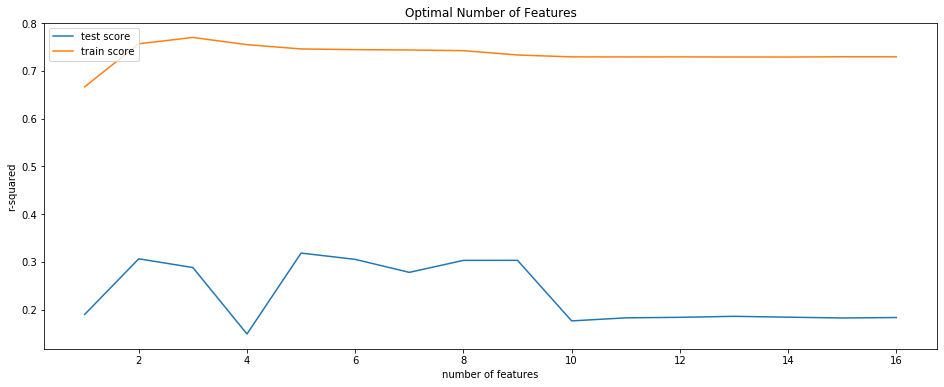

In [44]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [47]:
# final model
n_features_optimal = 5

lm = SVR(kernel = 'linear')
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.906309183110799


# Save the model using Pickle

In [26]:
# Save the model using pickle
import pickle

filename = "picklerfefile.pkl"
pickle.dump(rfe, open(filename, 'wb'))


# Conclusion:
we achieved highest accuracy score of 90% by using Support Vectore Clasifier which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the number of wins a baseball team will attain.